<a href="https://colab.research.google.com/github/aaroncdvd/HRBS-CA_Python_AI/blob/main/Class2_CaseStudy_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Class 2 April 1 2021

Today's Agenda:
*   Class 1 Review 
*   Case Study 1: Diabetes



## Class 1 Review

See Class 1 Notes for basics.  

*   variables (example usage: x=1)
*   lists (example usage: [1,2,3])
*   functions (example usage: def plus(a, b): return a + b)
*   conditional (example usage: if this == that: print('equal') else: print('not equal')) 

###Review Step -> Variables, Lists, Functions, Conditionals

In [294]:
#variable
x=1 
print(x)

#list
y=[1, 2, 3]
print(y) 

#function
def plus(a, b): 
  return a + b 
print(plus(1,2))

#conditional
if x == x: 
  print('equal') 
else: 
  print('not equal') 

1
[1, 2, 3]
3
equal


##[>](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data) Case Study 1: Diabetes

**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

###Import CSV Data

Import Pandas Module:

In [357]:
import pandas as pd

Load the diabetes dataset from CSV:

In [358]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv',header=0)

In [359]:
diabetes

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

###Histogram

**Create Dataset Histograms:**

*For One Variable*

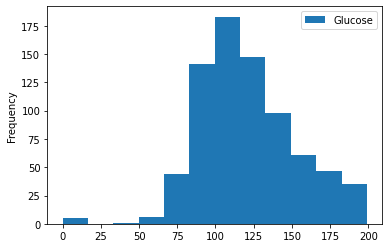

In [360]:
Glucose = diabetes[['Glucose']]
Glucose.plot.hist(bins=12)

*For One Variable Colored By Another Variable*

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


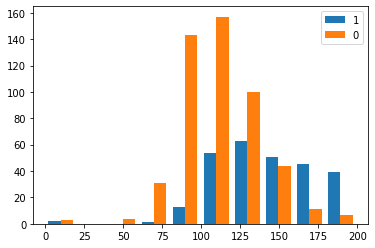

In [361]:
outcomes = diabetes.Outcome.unique()
plt.hist([diabetes.loc[diabetes.Outcome == x, 'Glucose'] for x in outcomes], label=outcomes)
plt.legend(outcomes)

*For Two Variables*

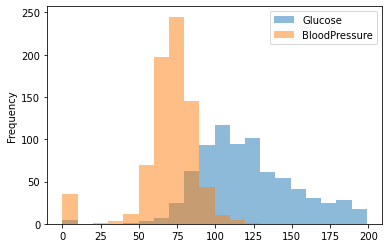

In [362]:
GlucoseAndBP = diabetes[['Glucose', 'BloodPressure']]
GlucoseAndBP.plot.hist(bins=20, alpha=0.5)

*Many Varaibles*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a55df2910>,
      dtype=object)

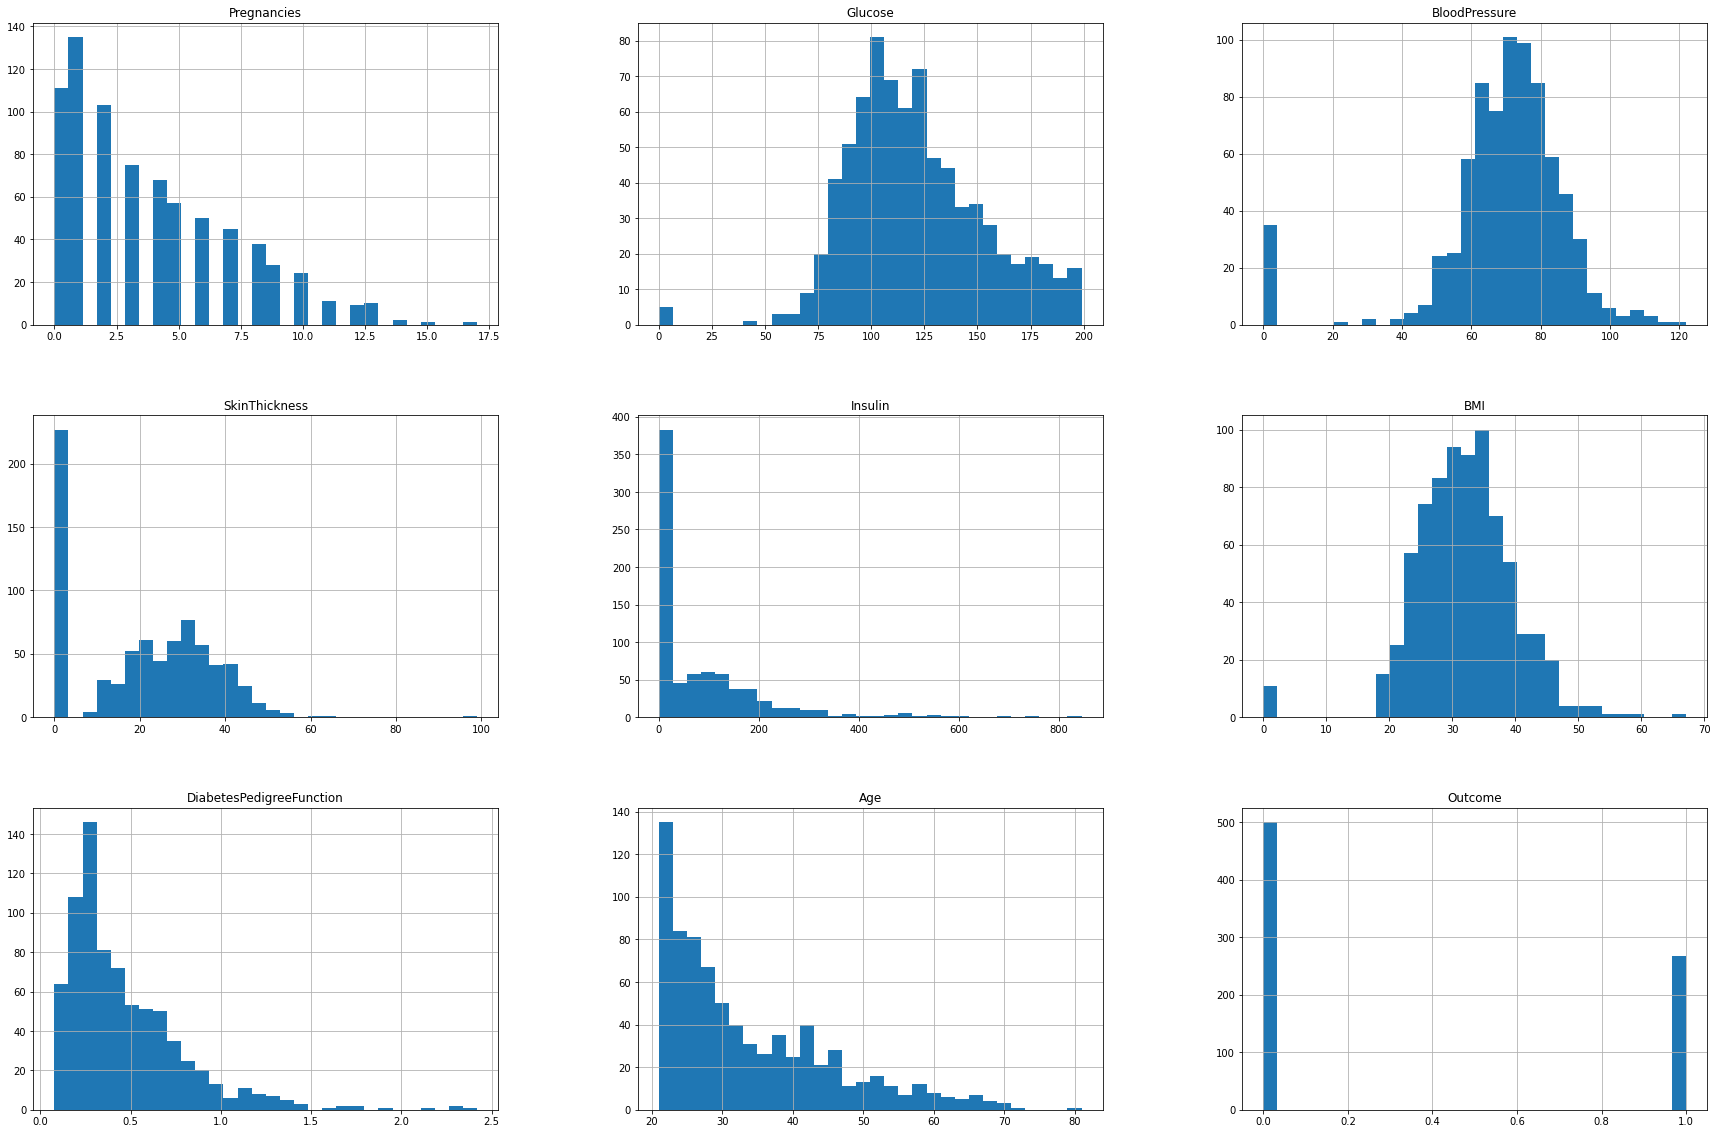

In [363]:
diabetes.hist(bins=30, figsize=(30, 20))

###Transform

Scale Columns By Linear Transformations to Improve Scatterplot:

In [364]:
diabetes['Insulin']= (diabetes['Insulin'] / 5)
diabetes['DiabetesPedigreeFunction']= (diabetes['DiabetesPedigreeFunction'] * 15)
diabetes['Pregnancies']= (diabetes['Pregnancies'] * 1)
diabetes['Glucose']= (diabetes['Glucose'] / 2)
diabetes['BMI']= (diabetes['BMI'] / 1)
diabetes['Outcome']= (diabetes['Outcome'] * 1)

###Boxplot

Create Dataset Boxplot:

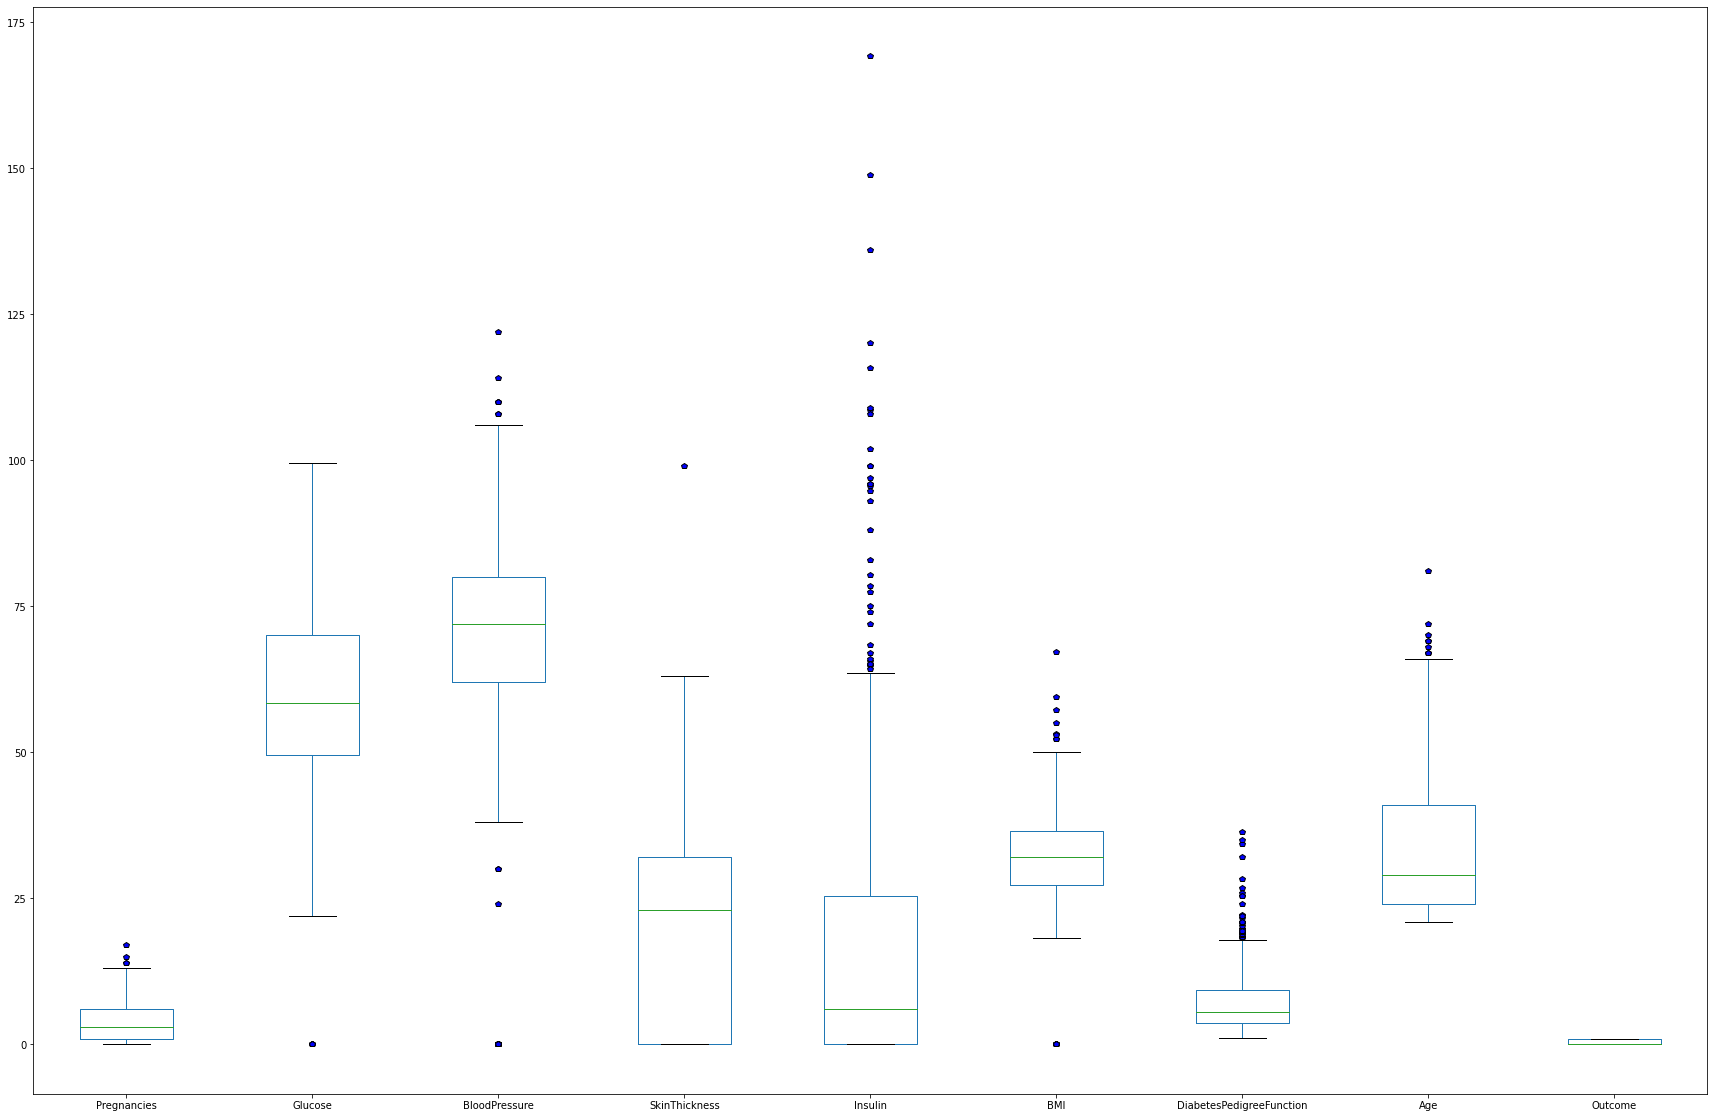

In [365]:
boxplot=diabetes.boxplot(figsize=(30,20),grid=False,flierprops=bit)

###Scatterplot by Size

Create Scatterplot By Size:

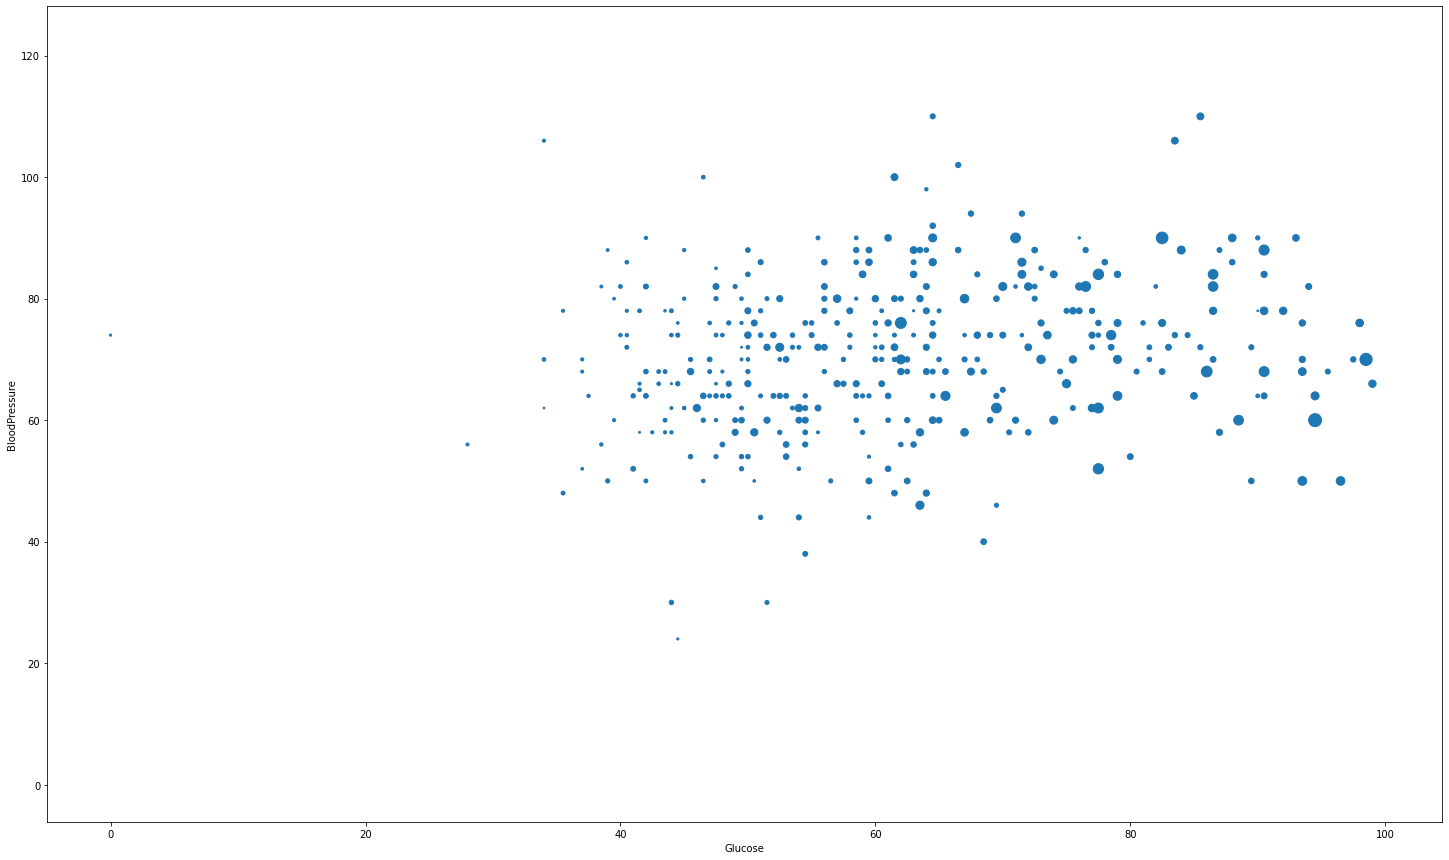

In [366]:
diabetes.plot.scatter(x='Glucose',
                      y='BloodPressure',
                      s='Insulin',
                      figsize=(25, 15))

###Scatterplot by Color

Create Scatterplot By Color:

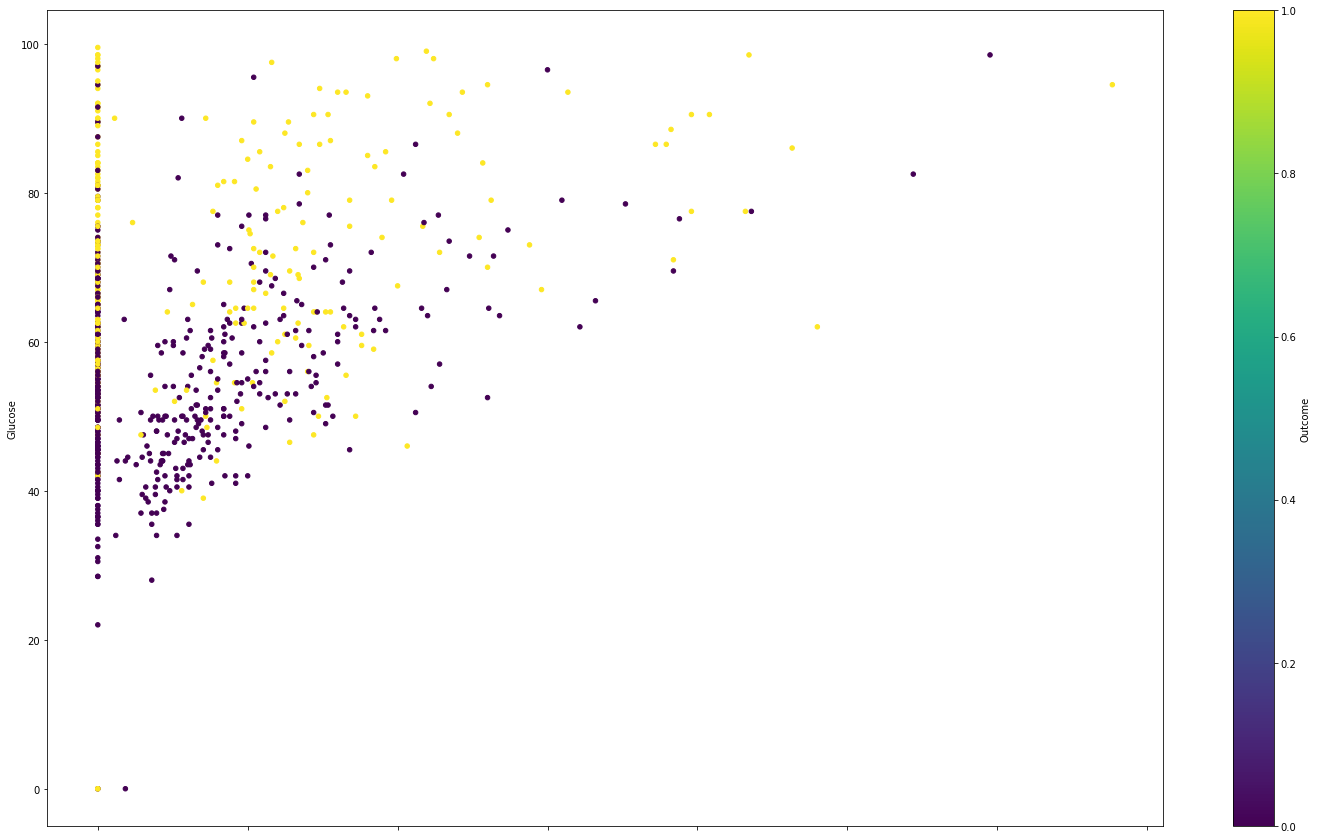

In [367]:
diabetes.plot.scatter(x='Insulin',
                      y='Glucose',
                      c='Outcome',
                      colormap='viridis',
                      figsize=(25, 15))

###Correlations

Import Modules Seaborn and Matplotlib.Pyplot:

In [368]:
import seaborn as sn
import matplotlib.pyplot as plt

Generate Dataset Correlation Matrix:

In [369]:
diabetes.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Generate Dataset Correlations Heatmap:

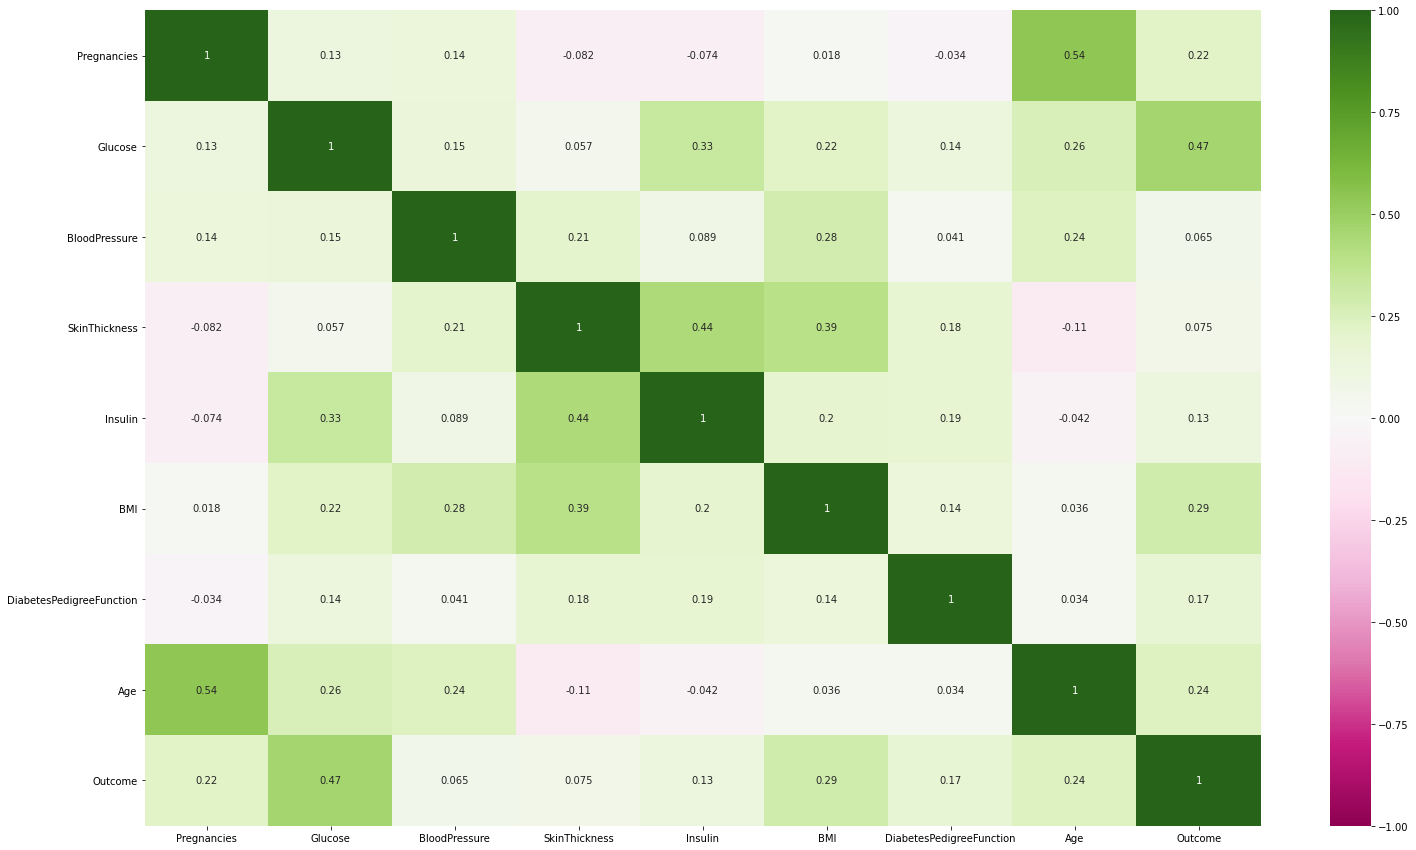

In [370]:
plt.subplots(figsize=(25,15)) 
sn.heatmap(corrMatrix, annot=True,vmin=-1, vmax=1,center=0, cmap="PiYG")
plt.show()

###**Question: Did our linear transformations affect the correlations?**


**NO** 
Linear transformations have no effect on Pearson's correlation coefficient. But, they are tools to help us for interpretation and visualization!

**EXAMPLE:** the correlation between height and weight is the same regardless of whether height is measured in inches, feet, centimeters or even miles.